In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data

##Data Loading

In [ ]:
# data = pd.read_csv("/content/drive/MyDrive/Data Science - DS/Churn_Modelling.csv")
data = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##Descriptive Statistic

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Visualization

##Correlation

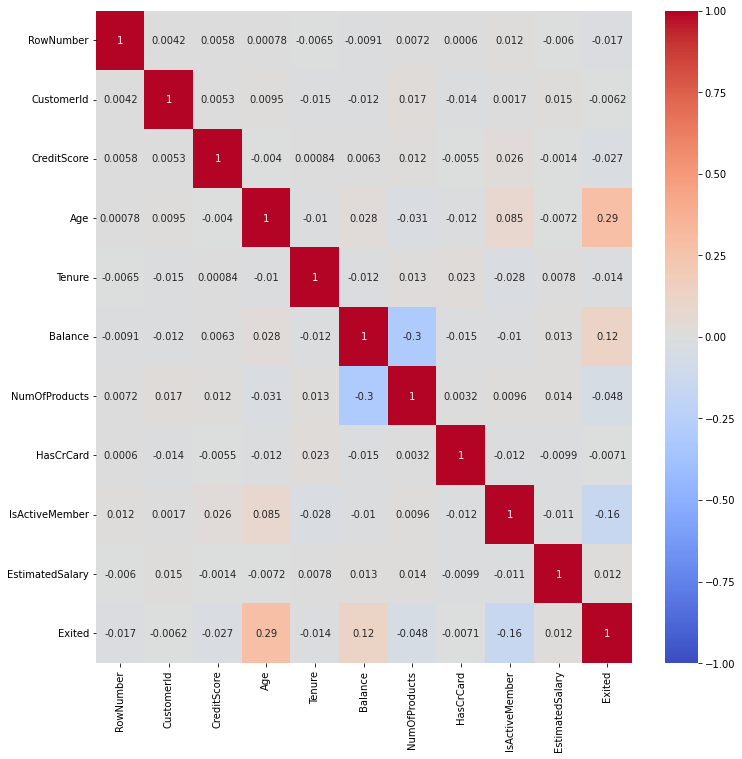

In [ ]:
corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

##Churn VS Stay

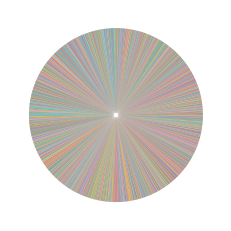

In [ ]:
plt.pie(data['Exited'])
plt.show()

##Gender and Geography

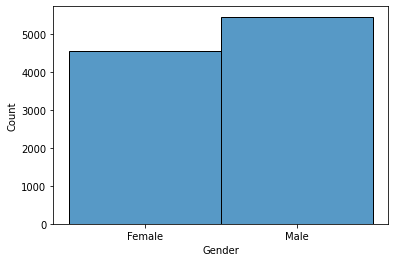

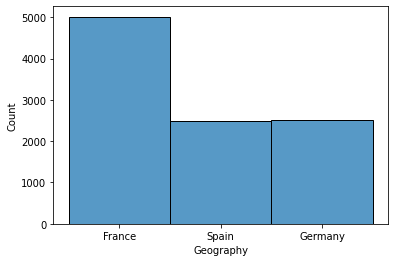

In [ ]:
sns.histplot(data['Gender'])
plt.show()

sns.histplot(data['Geography'])
plt.show()

##Gender and Geography who Exited

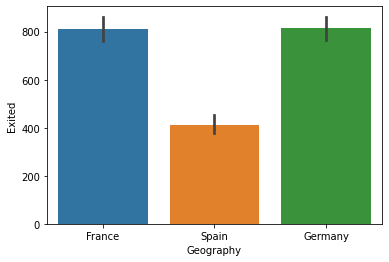

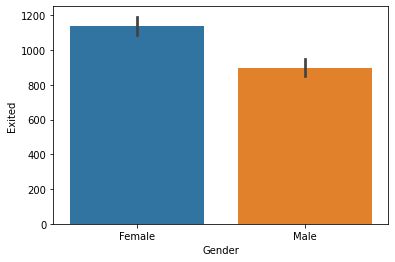

In [ ]:
sns.barplot(x=data['Geography'], y=data['Exited'], estimator = sum)
plt.show()
sns.barplot(x=data['Gender'], y=data['Exited'], estimator = sum)
plt.show()

In [ ]:
df = data.groupby(['Gender', 'Exited']).size().reset_index().pivot(columns='Gender', index='Exited', values=0)
df

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


##Box  Plot

RowNumber


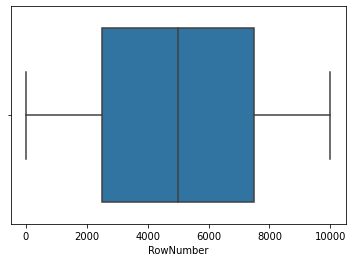

CustomerId


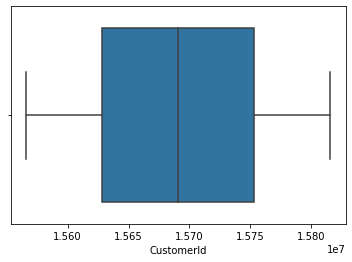

CreditScore


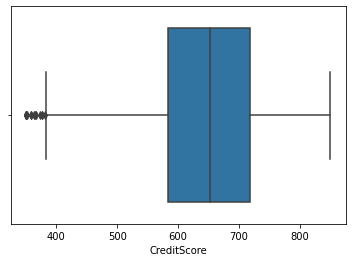

Age


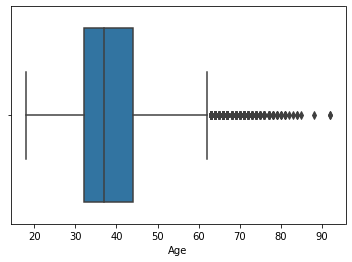

Tenure


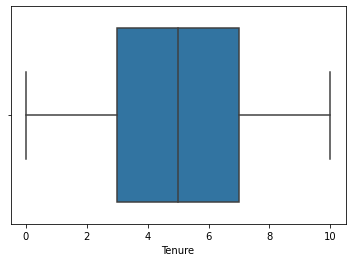

Balance


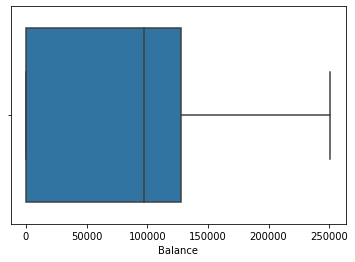

NumOfProducts


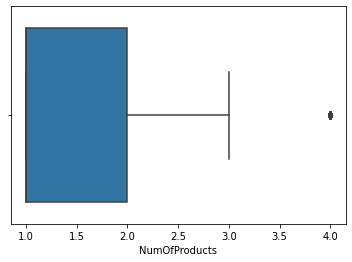

HasCrCard


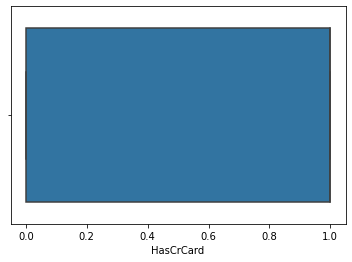

IsActiveMember


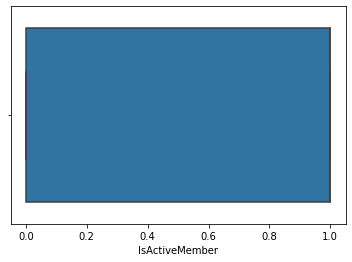

EstimatedSalary


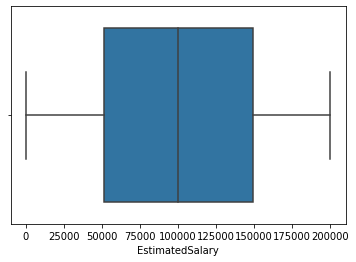

Exited


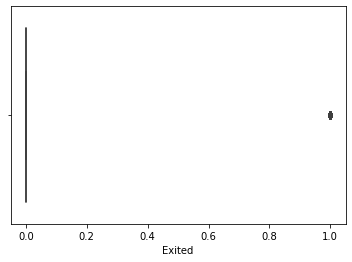

In [ ]:
for column in data:
    if data[column].dtypes == 'int64' or data[column].dtypes == 'float64':
        print(column)
        sns.boxplot(x = column, data = data)
        plt.show()

##Distribution

RowNumber


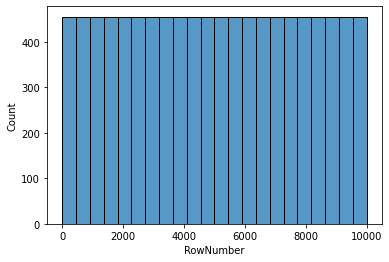

CustomerId


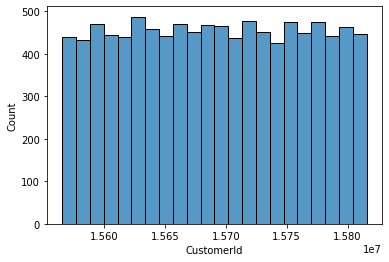

CreditScore


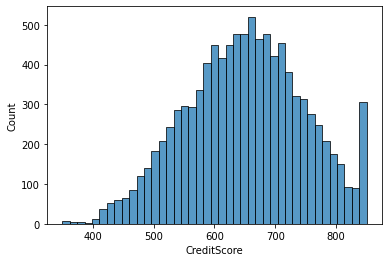

Age


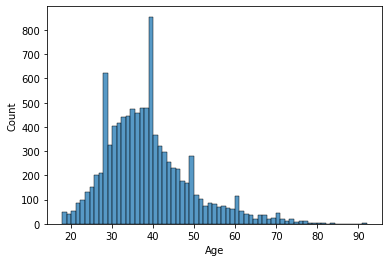

Tenure


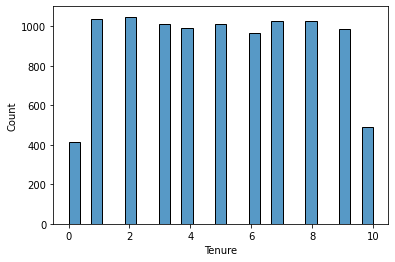

Balance


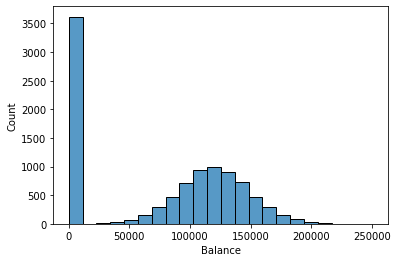

NumOfProducts


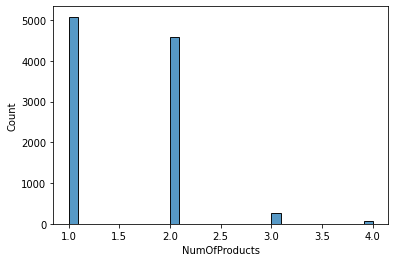

HasCrCard


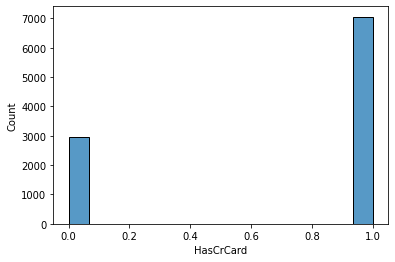

IsActiveMember


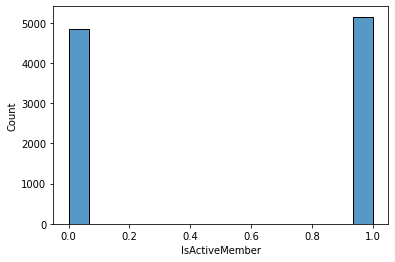

EstimatedSalary


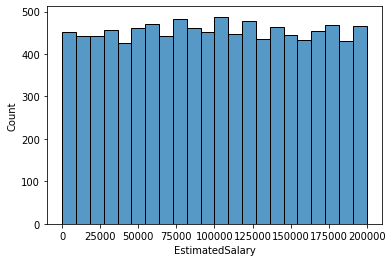

Exited


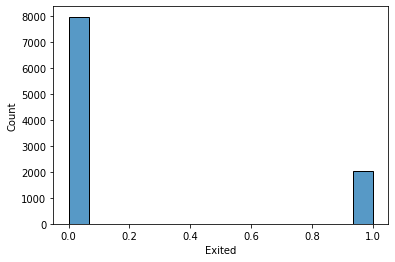

In [ ]:
# distribution
for column in data:
    if data[column].dtypes == 'int64' or data[column].dtypes == 'float64':
        print(column)
        sns.histplot(data[column])
        plt.show()


###Distribution Divided into Bins

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


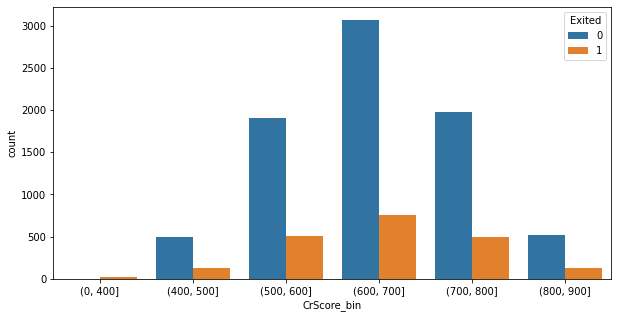

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


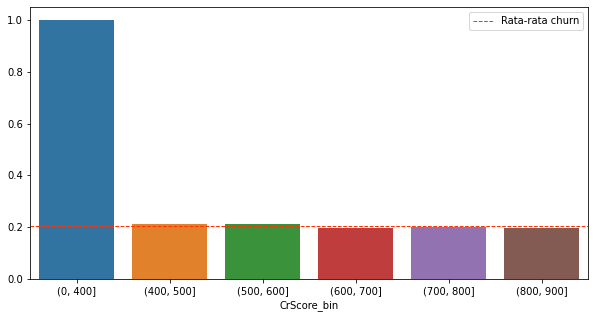

In [ ]:
# Divide into bins
data['CrScore_bin'] = pd.cut(data['CreditScore'], [0, 400, 500, 600, 700, 800, 900])

# lihat jumlah dan rata2 per bagian
data[['Exited','CrScore_bin']].groupby('CrScore_bin').agg(['mean','count'])

# tampilkan grafik komposisi yang keluar/stay
fig = plt.figure(figsize=(10,5))
sns.countplot('CrScore_bin', hue = 'Exited', data = data)
plt.show()

# 
df_exited_agebin = data[['Exited','CrScore_bin']].groupby('CrScore_bin').agg(['mean'])['Exited','mean']
fig = plt.figure(figsize=(10,5))
sns.barplot(df_exited_agebin.index,df_exited_agebin.values)
plt.axhline(y=data['Exited'].mean(), color='#ff3300', linestyle='--', linewidth=1, label='Rata-rata churn')
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


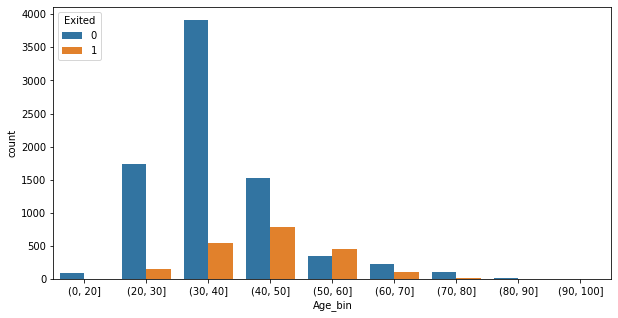

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


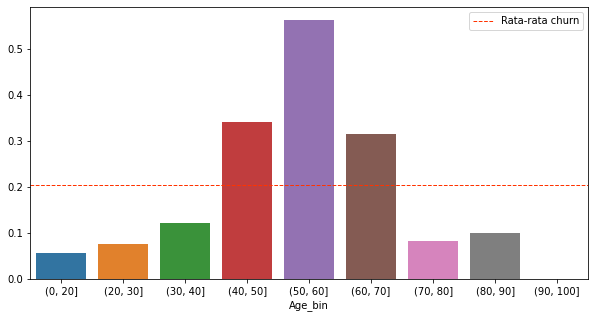

In [ ]:
# Divide Age into bins by decade
data['Age_bin'] = pd.cut(data['Age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

data[['Exited','Age_bin']].groupby('Age_bin').agg(['mean','count'])

fig = plt.figure(figsize=(10,5))
sns.countplot('Age_bin', hue = 'Exited', data = data)
plt.show()

df_exited_agebin = data[['Exited','Age_bin']].groupby('Age_bin').agg(['mean'])['Exited','mean']
fig = plt.figure(figsize=(10,5))
sns.barplot(df_exited_agebin.index,df_exited_agebin.values)
plt.axhline(y=data['Exited'].mean(), color='#ff3300', linestyle='--', linewidth=1, label='Rata-rata churn')
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


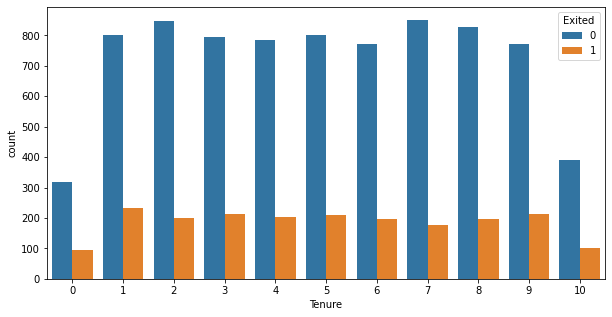

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


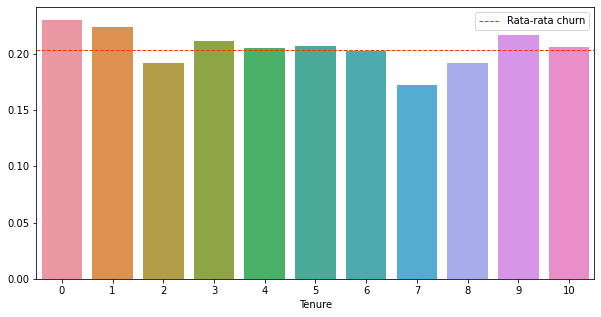

In [ ]:
# lihat jumlah dan rata2 per bagian
data[['Exited','Tenure']].groupby('Tenure').agg(['mean','count'])

# tampilkan grafik komposisi yang keluar/stay
fig = plt.figure(figsize=(10,5))
sns.countplot('Tenure', hue = 'Exited', data = data)
plt.show()

# 
df_exited_agebin = data[['Exited','Tenure']].groupby('Tenure').agg(['mean'])['Exited','mean']
fig = plt.figure(figsize=(10,5))
sns.barplot(df_exited_agebin.index,df_exited_agebin.values)
plt.axhline(y=data['Exited'].mean(), color='#ff3300', linestyle='--', linewidth=1, label='Rata-rata churn')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


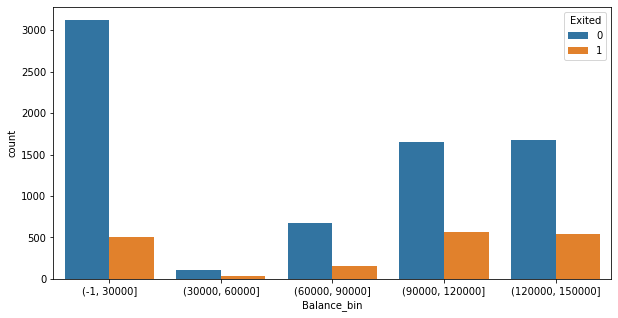

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


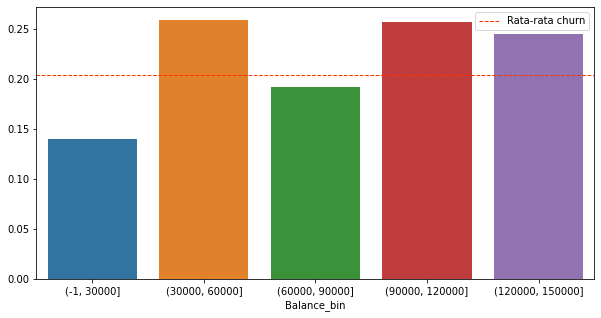

In [ ]:
# Divide into bins
data['Balance_bin'] = pd.cut(data['Balance'], [-1, 30000, 60000, 90000, 120000, 150000])
data.head()

# lihat jumlah dan rata2 per bagian
data[['Exited','Balance_bin']].groupby('Balance_bin').agg(['mean','count'])

# tampilkan grafik komposisi yang keluar/stay
fig = plt.figure(figsize=(10,5))
sns.countplot('Balance_bin', hue = 'Exited', data = data)
plt.show()

# 
df_exited_agebin = data[['Exited','Balance_bin']].groupby('Balance_bin').agg(['mean'])['Exited','mean']
fig = plt.figure(figsize=(10,5))
sns.barplot(df_exited_agebin.index,df_exited_agebin.values)
plt.axhline(y=data['Exited'].mean(), color='#ff3300', linestyle='--', linewidth=1, label='Rata-rata churn')
plt.legend()
plt.show()

In [ ]:
data['Balance'][data['Balance']==0].count()

3617

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


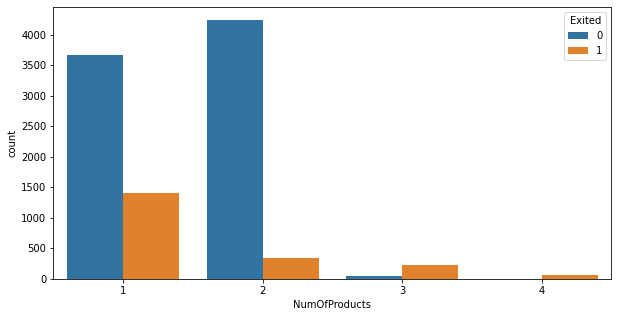

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


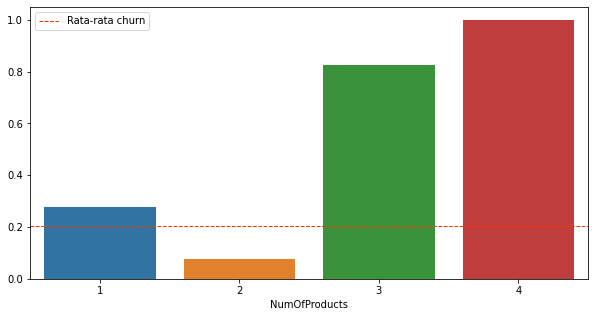

In [ ]:
# lihat jumlah dan rata2 per bagian
data[['Exited','NumOfProducts']].groupby('NumOfProducts').agg(['mean','count'])

# tampilkan grafik komposisi yang keluar/stay
fig = plt.figure(figsize=(10,5))
sns.countplot('NumOfProducts', hue = 'Exited', data = data)
plt.show()

# grafik  rata2 churn
df_exited_agebin = data[['Exited','NumOfProducts']].groupby('NumOfProducts').agg(['mean'])['Exited','mean']
fig = plt.figure(figsize=(10,5))
sns.barplot(df_exited_agebin.index,df_exited_agebin.values)
plt.axhline(y=data['Exited'].mean(), color='#ff3300', linestyle='--', linewidth=1, label='Rata-rata churn')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


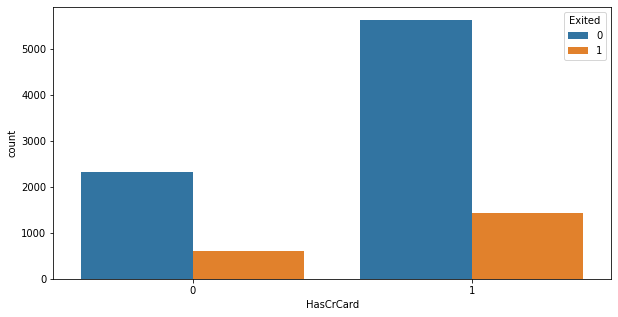

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


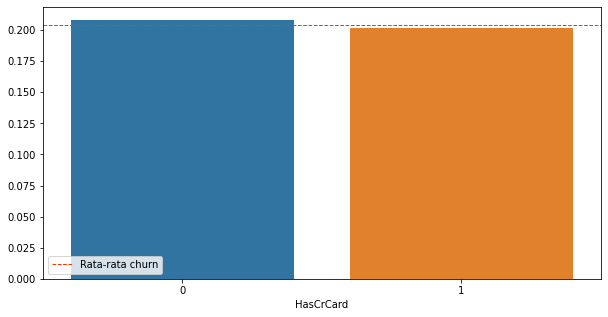

In [ ]:
# lihat jumlah dan rata2 per bagian
data[['Exited','HasCrCard']].groupby('HasCrCard').agg(['mean','count'])

# tampilkan grafik komposisi yang keluar/stay
fig = plt.figure(figsize=(10,5))
sns.countplot('HasCrCard', hue = 'Exited', data = data)
plt.show()

# 
df_exited_agebin = data[['Exited','HasCrCard']].groupby('HasCrCard').agg(['mean'])['Exited','mean']
fig = plt.figure(figsize=(10,5))
sns.barplot(df_exited_agebin.index,df_exited_agebin.values)
plt.axhline(y=data['Exited'].mean(), color='#ff3300', linestyle='--', linewidth=1, label='Rata-rata churn')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


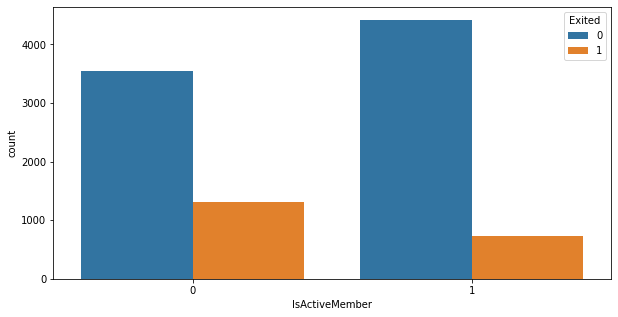

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


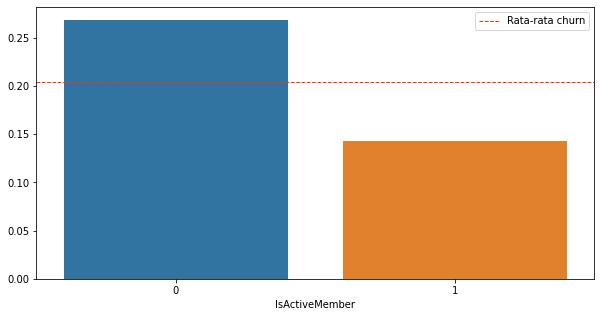

In [ ]:
# lihat jumlah dan rata2 per bagian
data[['Exited','IsActiveMember']].groupby('IsActiveMember').agg(['mean','count'])

# tampilkan grafik komposisi yang keluar/stay
fig = plt.figure(figsize=(10,5))
sns.countplot('IsActiveMember', hue = 'Exited', data = data)
plt.show()

# 
df_exited_agebin = data[['Exited','IsActiveMember']].groupby('IsActiveMember').agg(['mean'])['Exited','mean']
fig = plt.figure(figsize=(10,5))
sns.barplot(df_exited_agebin.index,df_exited_agebin.values)
plt.axhline(y=data['Exited'].mean(), color='#ff3300', linestyle='--', linewidth=1, label='Rata-rata churn')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


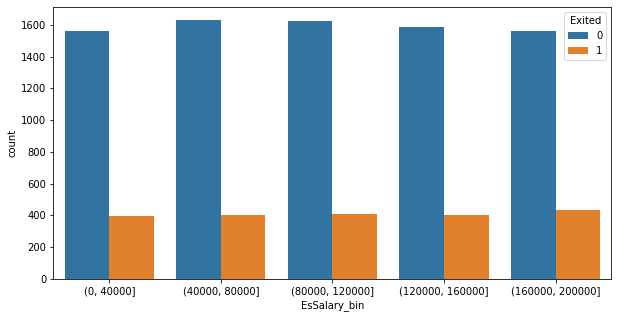

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


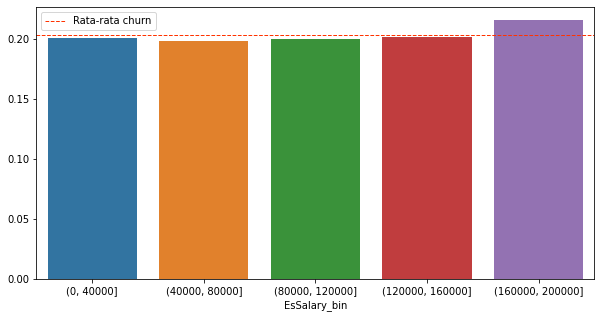

In [ ]:
# Divide into bins
# data['EsSalary_bin'] = pd.cut(data['EstimatedSalary'], [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000])
data['EsSalary_bin'] = pd.cut(data['EstimatedSalary'], [0, 40000, 80000, 120000, 160000, 200000])

data.head()

# lihat jumlah dan rata2 per bagian
data[['Exited','EsSalary_bin']].groupby('EsSalary_bin').agg(['mean','count'])

# tampilkan grafik komposisi yang keluar/stay
fig = plt.figure(figsize=(10,5))
sns.countplot('EsSalary_bin', hue = 'Exited', data = data)
plt.show()

# 
df_exited_agebin = data[['Exited','EsSalary_bin']].groupby('EsSalary_bin').agg(['mean'])['Exited','mean']
fig = plt.figure(figsize=(10,5))
sns.barplot(df_exited_agebin.index,df_exited_agebin.values)
plt.axhline(y=data['Exited'].mean(), color='#ff3300', linestyle='--', linewidth=1, label='Rata-rata churn')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


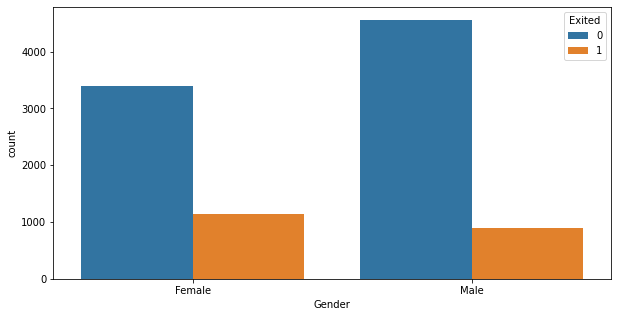

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


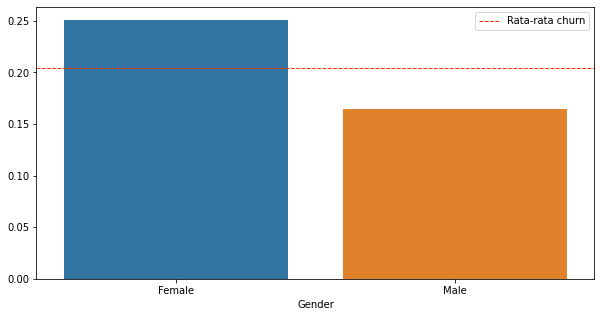

In [ ]:
# lihat jumlah dan rata2 per bagian
data[['Exited','Gender']].groupby('Gender').agg(['mean','count'])

# tampilkan grafik komposisi yang keluar/stay
fig = plt.figure(figsize=(10,5))
sns.countplot('Gender', hue = 'Exited', data = data)
plt.show()

# 
df_exited_agebin = data[['Exited','Gender']].groupby('Gender').agg(['mean'])['Exited','mean']
fig = plt.figure(figsize=(10,5))
sns.barplot(df_exited_agebin.index,df_exited_agebin.values)
plt.axhline(y=data['Exited'].mean(), color='#ff3300', linestyle='--', linewidth=1, label='Rata-rata churn')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


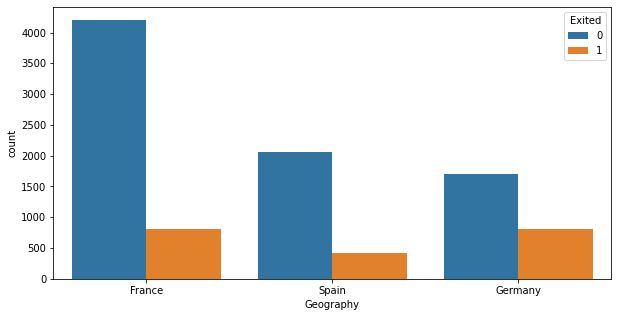

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


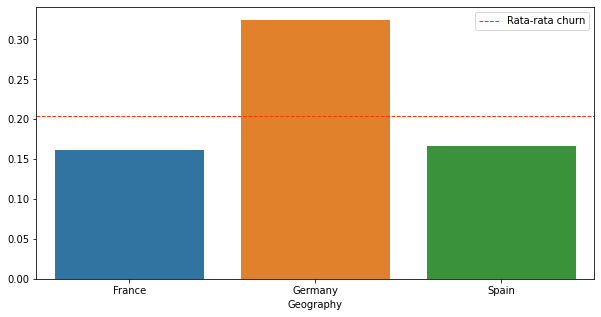

In [ ]:
# lihat jumlah dan rata2 per bagian
data[['Exited','Geography']].groupby('Geography').agg(['mean','count'])

# tampilkan grafik komposisi yang keluar/stay
fig = plt.figure(figsize=(10,5))
sns.countplot('Geography', hue = 'Exited', data = data)
plt.show()

# 
df_exited_agebin = data[['Exited','Geography']].groupby('Geography').agg(['mean'])['Exited','mean']
fig = plt.figure(figsize=(10,5))
sns.barplot(df_exited_agebin.index,df_exited_agebin.values)
plt.axhline(y=data['Exited'].mean(), color='#ff3300', linestyle='--', linewidth=1, label='Rata-rata churn')
plt.legend()
plt.show()

#Data Preprocessing

##Label Encoder

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df = pd.get_dummies(data, columns=['Gender'], drop_first=True)
df = pd.get_dummies(df, columns=['Geography'])
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,1,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,1,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,1,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1,0


##One Hot Encoder

In [ ]:
df = pd.get_dummies(df.drop(columns = ["CustomerId","RowNumber","Surname", "Tenure", "HasCrCard", "EstimatedSalary"]))
df

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Exited,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,0.00,1,1,1,0,1,0,0
1,608,41,83807.86,1,1,0,0,0,0,1
2,502,42,159660.80,3,0,1,0,1,0,0
3,699,39,0.00,2,0,0,0,1,0,0
4,850,43,125510.82,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,0,0,1,1,0,0
9996,516,35,57369.61,1,1,0,1,1,0,0
9997,709,36,0.00,1,1,1,0,1,0,0
9998,772,42,75075.31,2,0,1,1,0,1,0


##Train-Test Split

In [ ]:
X = df.drop(columns=[ 'Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

##Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

##Imbalance Dataset

In [ ]:
from collections import Counter

In [ ]:
Counter(y_train)

Counter({0: 6365, 1: 1635})

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersampling.fit_resample(X_train,y_train)
X_under = pd.DataFrame(X_under, columns=X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_dummy = pd.get_dummies(X_under)
X_dummy = X_dummy.fillna(0)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 1)
X_smote, y_smote = smote.fit_resample(X_dummy,y_under)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Counter(y_smote)

Counter({0: 3270, 1: 3270})

In [ ]:
X_smote = pd.DataFrame(X_smote, columns=X.columns)
X_smote

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,-0.015286,0.755119,-1.223126,0.806566,0.964625,0.917399,1.00075,-0.577350,-0.577928
1,-1.085203,0.470865,0.824461,-0.912732,-1.036672,-1.090038,-0.99925,1.732051,-0.577928
2,-1.486422,0.091861,-1.223126,-0.912732,0.964625,-1.090038,1.00075,-0.577350,-0.577928
3,1.178083,-0.666147,1.636184,-0.912732,-1.036672,-1.090038,-0.99925,-0.577350,1.730320
4,0.252193,-0.002890,-1.223126,0.806566,-1.036672,0.917399,1.00075,-0.577350,-0.577928
...,...,...,...,...,...,...,...,...,...
6535,1.131772,-1.493082,0.735276,-0.912732,-1.036672,-1.090038,-0.99925,1.732051,-0.577928
6536,0.110168,-0.381894,0.604685,-0.912732,-1.036672,0.917399,-0.99925,1.732051,-0.577928
6537,0.318552,0.830237,0.545551,-0.912732,-1.036672,-1.090038,-0.99925,1.732051,-0.577928
6538,1.120924,0.243064,1.046346,2.525863,-1.036672,-1.090038,1.00075,-0.577350,-0.577928


#Modeling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    specificity = round((tn) / (tn+fp) * 100, 2)
    npv = round((tn) / (tn+fn) * 100, 2)
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('Specificity:', specificity, '%')
    print('NPV        :', npv, '%')

## ANN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=11, activation='relu'))
ann.add(tf.keras.layers.Dropout(.2, input_shape=(11,)))
ann.add(tf.keras.layers.Dense(units=11, activation='relu'))
ann.add(tf.keras.layers.Dropout(.2, input_shape=(11,)))
ann.add(tf.keras.layers.Dense(units=11, activation='relu'))
ann.add(tf.keras.layers.Dropout(.2, input_shape=(11,)))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_smote, y_smote, batch_size = 32, epochs = 100)

Epoch 1/100
299/299 [==============================] - 2s 2ms/step - loss: 0.6260 - accuracy: 0.6668
Epoch 2/100
299/299 [==============================] - 1s 2ms/step - loss: 0.5689 - accuracy: 0.6849
Epoch 3/100
299/299 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.7115
Epoch 4/100
299/299 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7170
Epoch 5/100
299/299 [==============================] - 1s 2ms/step - loss: 0.5284 - accuracy: 0.7293
Epoch 6/100
299/299 [==============================] - 1s 2ms/step - loss: 0.5195 - accuracy: 0.7376
Epoch 7/100
299/299 [==============================] - 1s 2ms/step - loss: 0.5175 - accuracy: 0.7397
Epoch 8/100
299/299 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7520
Epoch 9/100
299/299 [==============================] - 1s 2ms/step - loss: 0.5010 - accuracy: 0.7604
Epoch 10/100
299/299 [==============================] - 0s 2ms/step - loss: 0.4944 - accura

In [ ]:
y_test_pred_smote = ann.predict(X_test)
y_test_pred_smote = [0 if i < 0.5 else 1 for i in y_test_pred_smote]

compare = pd.DataFrame(np.array(y_test), columns=['Actual'])
compare['Predicted'] = y_test_pred_smote
# Testing Performance
classification_eval(y_test, y_test_pred_smote, 'ANN Testing Perf.')

Evaluation Model: ANN Testing Perf.
[[1463  135]
 [ 183  219]]
Accuracy   : 84.1 %
Precision  : 61.86 %
Recall     : 54.48 %
Specificity: 91.55 %
NPV        : 88.88 %


## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV


clf = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='binary:logistic',
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)
clf = CalibratedClassifierCV(clf, method='isotonic', cv=2)
clf.fit(X_smote, y_smote)


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=10,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=100, n_jobs=1,
                                                    nthread=-1,
                                                    objective='binary:logistic',
                                                    random_state=0

In [ ]:
y_pred_test = clf.predict(X_test)
classification_eval(y_test, y_pred_test,"XGBoost Testing Perf.")

Evaluation Model: XGBoost Testing Perf.
[[1297  301]
 [ 118  284]]
Accuracy   : 79.05 %
Precision  : 48.55 %
Recall     : 70.65 %
Specificity: 81.16 %
NPV        : 91.66 %


In [ ]:
y_pred_train = clf.predict(X_smote)
classification_eval(y_smote, y_pred_train,"XGBoost Training Perf.")

Evaluation Model: XGBoost Training Perf.
[[2992  278]
 [ 258 3012]]
Accuracy   : 91.8 %
Precision  : 91.55 %
Recall     : 92.11 %
Specificity: 91.5 %
NPV        : 92.06 %
